In [1]:
#Q1.

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
# EDA
X = iris["data"] 
y = iris['target']

print('x\n',X[:5])
print('y\n',y[:5])

x
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
y
 [0 0 0 0 0]


In [4]:
# sepearte
# module import
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                test_size=0.2,
                                                random_state=100)

In [5]:
# Machine Learning model
from sklearn.tree import DecisionTreeClassifier
dclf = DecisionTreeClassifier()

In [6]:
# fit
dclf.fit(X_train,y_train)

# predict
pred = dclf.predict(X_test)

In [7]:
# Evaluation
# module import
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

def get_ml_eval(y_test,prediction):
    accuracy = accuracy_score(y_test,prediction)
    confusion = confusion_matrix(y_test,prediction)
    print("accuracy : {:.4f}\nconfusion\n".format(accuracy),confusion)
    return

get_ml_eval(y_test,pred)

accuracy : 0.9667
confusion
 [[11  0  0]
 [ 0  5  1]
 [ 0  0 13]]


In [8]:
# report
from sklearn.metrics import classification_report
report = classification_report(y_test,pred,output_dict=True)
display(report)

{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 11},
 '1': {'precision': 1.0,
  'recall': 0.8333333333333334,
  'f1-score': 0.9090909090909091,
  'support': 6},
 '2': {'precision': 0.9285714285714286,
  'recall': 1.0,
  'f1-score': 0.962962962962963,
  'support': 13},
 'accuracy': 0.9666666666666667,
 'macro avg': {'precision': 0.9761904761904763,
  'recall': 0.9444444444444445,
  'f1-score': 0.957351290684624,
  'support': 30},
 'weighted avg': {'precision': 0.9690476190476189,
  'recall': 0.9666666666666667,
  'f1-score': 0.9657687991021324,
  'support': 30}}

In [39]:
import pandas as pd
tdf = pd.read_csv('dataset/train.csv')

In [40]:
# 사용자 함수
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder


# 불필요한 칼럼 삭제
def drop_features(df):
    df.drop(['PassengerId','Ticket','Cabin'], axis=1, inplace=True)
    return df

# Null 처리
def fillna(df):   
    most_town = df['Embarked'].value_counts(dropna=True).idxmax()
    df['Embarked'].fillna(most_town, inplace=True)
    return df

#  레이블 인코딩
def format_features(df):
    
    features=['Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        df[feature] = le.fit_transform(df[feature])
    return df

# 앞에서 설정한 Data Processing 함수 호출
def transform_features(df):
    drop_features(df)
    fillna(df)
    format_features(df)   
    return df

tdf = transform_features(tdf)
tdf.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2


In [41]:
# Null 처리 방법
# Embarked - 빈도가 가장 많은 도시로 대체
# Age - 'Name' 컬럼에 있는 호칭을 이용하여 Title 컬럼을 만들고 아래와 같은 공통 그룹 평균으로 대체

tdf['Title']= tdf.Name.str.extract('([A-Za-z]+)\.')

tdf['Title'].replace(['Mr','Miss','Mrs','Master','Rev', 'Dr','Col','Major','Ms','Mlle','Countess',
'Sir','Jonkheer','Dona','Capt','Lady','Don','Mme'], ['Mr','Miss','Mrs','Master','Mr','Other','Mr','Mr',
'Mrs','Miss','Mrs','Mr','Mr','Other','Mr','Mrs','Mr','Mms'], inplace=True)

tdf.groupby('Title').Age.describe()

tdf.loc[(tdf.Age.isnull()) & (tdf.Title == 'Mr'), 'Age'] = tdf[tdf.Title == 'Mr'].Age.mean()
tdf.loc[(tdf.Age.isnull()) & (tdf.Title == 'Miss'), 'Age'] = tdf[tdf.Title == 'Miss'].Age.mean()
tdf.loc[(tdf.Age.isnull()) & (tdf.Title == 'Mms'), 'Age'] = tdf[tdf.Title == 'Mms'].Age.mean()
tdf.loc[(tdf.Age.isnull()) & (tdf.Title == 'Mrs'), 'Age'] = tdf[tdf.Title == 'Mrs'].Age.mean()
tdf.loc[(tdf.Age.isnull()) & (tdf.Title == 'Master'), 'Age'] = tdf[tdf.Title == 'Master'].Age.mean()
tdf.loc[(tdf.Age.isnull()) & (tdf.Title == 'Other'), 'Age'] = tdf.Age.mean()
tdf.Age.isnull().sum()

def get_category(age):
    cat = ''
    if age < 10: cat = '10s'
    elif age < 20: cat = '20s'
    elif age < 30: cat = '30s'
    elif age < 40: cat = '40s'
    elif age < 50: cat = '50s'    
    else : cat = 'Elderly'
    
    return cat

tdf['Age_cat'] = tdf['Age'].apply(lambda x : get_category(x) )
tdf[['Age', 'Age_cat']].head()

# 가족 수별로 카테고리화. (1인: Single, 2~4인: Small, 5인: Big)
tdf['Family'] = tdf.SibSp + tdf.Parch

def cat_size(x):
    if x == 0:
        return 'Single'
    elif x < 4:
        return 'Small'
    else:
        return 'Big'
    
tdf['Family_size'] = tdf.Family.apply(lambda x: cat_size(x))

# Embarked, Family_size, Age_cat 칼럼 one-hot encoding
tdf = pd.get_dummies(data = tdf, columns = ['Embarked'], prefix = 'Town')
tdf = pd.get_dummies(data = tdf, columns = ['Family_size'], prefix = 'Family')
tdf = pd.get_dummies(data = tdf, columns = ['Age_cat'], prefix='Age')
tdf.head()

bins = [0,4,8,14,31,513]
bin_name = [0,1,2,3,4]
tdf['Fare_cat'] = pd.cut(tdf['Fare'],bins = bins,labels=bin_name,include_lowest = True)

tdf1 =tdf.drop(['Name','Age','SibSp','Parch','Title','Family','Fare','Pclass'],axis=1 )
tdf1.head()

,Survived,Sex,Town_0,Town_1,Town_2,Family_Big,Family_Single,Family_Small,Age_10s,Age_20s,Age_30s,Age_40s,Age_50s,Age_Elderly,Fare_cat
0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1
1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,4
2,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1
3,1,0,0,0,1,0,0,1,0,0,0,1,0,0,4
4,0,1,0,0,1,0,1,0,0,0,0,1,0,0,2


In [42]:
import pandas as pd
tdf1.to_pickle('dataset/tdf1.pkl')

import pandas as pd
tdf1 = pd.read_pickle('dataset/tdf1.pkl')
tdf1.head()

,Survived,Sex,Town_0,Town_1,Town_2,Family_Big,Family_Single,Family_Small,Age_10s,Age_20s,Age_30s,Age_40s,Age_50s,Age_Elderly,Fare_cat
0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1
1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,4
2,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1
3,1,0,0,0,1,0,0,1,0,0,0,1,0,0,4
4,0,1,0,0,1,0,1,0,0,0,0,1,0,0,2


In [43]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# 독립변수, 종속변수 분리
X = tdf1.drop('Survived',axis=1)
y = tdf1['Survived']

# 독립변수 정규화(평균 0, 분산 1인 표준정규분포)
X = preprocessing.StandardScaler().fit(X).transform(X)

# 학습용 테이터와 평가용 데이터를 8:2로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, \
                                                    random_state=10) 



In [44]:
# machine learning model import
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

dt = DecisionTreeClassifier()
lr = LinearRegression()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
svm = SVC()

In [45]:
# fit
models = [dt,lr,rf,knn,svm]
for model in models:
    model.fit(X_train,y_train)

In [46]:
# predict
dt_pred = dt.predict(X_test)
lr_pred = dt.predict(X_test)
rf_pred = dt.predict(X_test)
knn_pred = dt.predict(X_test)
svm_pred = dt.predict(X_test)

In [47]:
# proba
dt_proba = dt.predict_proba(X_test)[:,1]
lr_proba = dt.predict_proba(X_test)[:,1]
rf_proba = dt.predict_proba(X_test)[:,1]
knn_proba = dt.predict_proba(X_test)[:,1]
svm_proba = dt.predict_proba(X_test)[:,1]

In [48]:
# Evaluation
# module import
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

def get_eval(model,y_test,prediction,proba):
    confusion = confusion_matrix(y_test,prediction)
    accuracy = accuracy_score(y_test,prediction)
    precision = precision_score(y_test,prediction)
    recall = recall_score(y_test,prediction)
    f1 = f1_score(y_test,prediction)
    roc_auc = roc_auc_score(y_test,proba)
    print('model:', model,'\n')
    print('confusion_matrix\n', confusion,'\n')
    print('accuracy: {:.4f}'.format(accuracy))
    print('precision: {:.4f}'.format(accuracy))
    print('recall: {:.4f}'.format(recall))
    print('f1_score: {:.4f}'.format(f1))
    print('roc_auc: {:.4f}'.format(roc_auc))
    print('-------'*10)

#dt
get_eval(dt,y_test,dt_pred,dt_proba)
get_eval(lr,y_test,lr_pred,lr_proba)
get_eval(rf,y_test,rf_pred,rf_proba)
get_eval(knn,y_test,knn_pred,knn_proba)

# report
from sklearn.metrics import classification_report
def report(y_test,prediction):
    print(classification_report(y_test,prediction))

                          
report(y_test,svm_pred)

model: DecisionTreeClassifier() 

confusion_matrix
 [[107  10]
 [ 15  47]] 

accuracy: 0.8603
precision: 0.8603
recall: 0.7581
f1_score: 0.7899
roc_auc: 0.8529
----------------------------------------------------------------------
model: LinearRegression() 

confusion_matrix
 [[107  10]
 [ 15  47]] 

accuracy: 0.8603
precision: 0.8603
recall: 0.7581
f1_score: 0.7899
roc_auc: 0.8529
----------------------------------------------------------------------
model: RandomForestClassifier() 

confusion_matrix
 [[107  10]
 [ 15  47]] 

accuracy: 0.8603
precision: 0.8603
recall: 0.7581
f1_score: 0.7899
roc_auc: 0.8529
----------------------------------------------------------------------
model: KNeighborsClassifier() 

confusion_matrix
 [[107  10]
 [ 15  47]] 

accuracy: 0.8603
precision: 0.8603
recall: 0.7581
f1_score: 0.7899
roc_auc: 0.8529
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      

In [49]:
# Cross_val_score module import
from sklearn.model_selection import cross_val_score
accuracy_mean = cross_val_score(rf,X,y,scoring='accuracy',cv=5)
print("accuracy_mean:",accuracy_mean.mean())

accuracy_mean: 0.7968740192078337


In [50]:
# Cross_validation_model import
from sklearn.model_selection import GridSearchCV
params = {'max_depth':[None, 5, 10, 20, 50]}

grid_rf = GridSearchCV(rf, param_grid=params, scoring='accuracy', cv=5, refit=True,
                      verbose=2,n_jobs=-1)
grid_rf.fit(X_train,y_train)

print("best_params_", grid_rf.best_params_)
print("best_accuracy", grid_rf.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
best_params_ {'max_depth': 5}
best_accuracy 0.8131980695360976


In [51]:
# developing model
best_rf = grid_rf.best_estimator_
print(best_rf)

# dev_pred
rf_dev_pred = best_rf.predict(X_test)

# dev_proba
rf_dev_proba = best_rf.predict_proba(X_test)[:,1]

# dev_eval
get_eval(best_rf,y_test,rf_dev_pred,rf_dev_proba)

RandomForestClassifier(max_depth=5)
model: RandomForestClassifier(max_depth=5) 

confusion_matrix
 [[104  13]
 [ 14  48]] 

accuracy: 0.8492
precision: 0.8492
recall: 0.7742
f1_score: 0.7805
roc_auc: 0.8722
----------------------------------------------------------------------


In [52]:
best_rf 

RandomForestClassifier(max_depth=5)

In [53]:
best_rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5)

In [54]:
AA = best_rf.predict(X_test)
BB = best_rf.predict_proba(X_test)[:,1]
get_eval(best_rf,y_test,AA,BB)

model: RandomForestClassifier(max_depth=5) 

confusion_matrix
 [[105  12]
 [ 15  47]] 

accuracy: 0.8492
precision: 0.8492
recall: 0.7581
f1_score: 0.7769
roc_auc: 0.8741
----------------------------------------------------------------------


In [56]:
# module import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# load data
diabetes = pd.read_csv('dataset/diabetes.csv')

In [63]:
# EDA
diabetes.describe()

# Glucose / BloodPressure / SkinThickness/ Insulin cannot be value=0
zero_features = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']

total_count = diabetes.Glucose.count()

for feature in zero_features:
    zero_count = diabetes[diabetes[feature] == 0][feature].count()
    print('{0} value_counts : {1}, percentage {2:.2f} %'.format(feature,
                                               zero_count,
                                               100*zero_count/total_count))
    
diabetes[zero_features] = diabetes[zero_features].replace(0,diabetes[zero_features].mean())

Glucose value_counts : 5, percentage 0.65 %
BloodPressure value_counts : 35, percentage 4.56 %
SkinThickness value_counts : 227, percentage 29.56 %
Insulin value_counts : 374, percentage 48.70 %
BMI value_counts : 11, percentage 1.43 %


In [68]:
diabetes.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.0,79.799479,26.6,0.351,31,0


In [69]:
# Sepearte
X = diabetes.iloc[:,:-1]
y = diabetes.iloc[:,-1]

# Scaler
# module import
from sklearn.preprocessing import StandardScaler
st_scaler = StandardScaler()
X_s = st_scaler.fit_transform(X)

# Sepearte
X_train,X_test,y_train,y_test = train_test_split(X_s,y,
                                                test_size=0.2,
                                                random_state=101,
                                                stratify=y)

In [73]:
# Machine Learning model import
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()

In [76]:
# fit
lgr.fit(X_train,y_train)
lgr_pred = lgr.predict(X_test)
lgr_proba = lgr.predict_proba(X_test)[:,1]
get_eval(lgr,y_test,lgr_pred,lgr_proba)

model: LogisticRegression() 

confusion_matrix
 [[90 10]
 [28 26]] 

accuracy: 0.7532
precision: 0.7532
recall: 0.4815
f1_score: 0.5778
roc_auc: 0.8150
----------------------------------------------------------------------


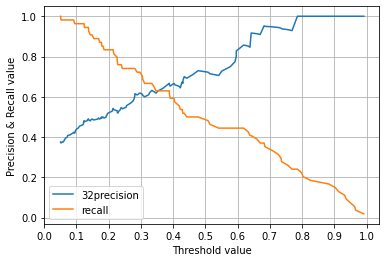

In [87]:
# Threshold / precision_recall_curve
# module import
from sklearn.metrics import precision_recall_curve
def p_r_c(y_test,pred_proba):
    precision, recall, threshold = precision_recall_curve(y_test, pred_proba)
    threshold_B = threshold.shape[0]
    plt.plot(threshold,precision[0:threshold_B],linestyle='solid', label = '32precision')
    plt.plot(threshold,recall[0:threshold_B],label='recall')
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlabel("Threshold value")
    plt.ylabel("Precision & Recall value")
    plt.legend()
    plt.grid()
p_r_c(y_test,lgr_proba)

In [108]:
from sklearn.preprocessing import Binarizer
def get_eval_threshold(y_test,pred_proba,thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba)
        custom_predict = binarizer.transform(pred_proba)
        print('임계값:',custom_threshold)
        name = lgr
        get_eval(name,y_test,custom_predict,pred_proba)
threshold = [0.3,0.4,0.45,0.5,0.55,0.6,0.7]
get_eval_threshold(y_test,lgr_proba.reshape(-1,1),threshold)

binarizer1 = Binarizer(threshold=0.48)
pred_th_048 = binarizer1.fit_transform(lgr_proba.reshape(-1,1))
name = lgr
print(get_eval(name,y_test,pred_th_048,lgr_proba[:,1]))

임계값: 0.3
model: LogisticRegression() 

confusion_matrix
 [[76 24]
 [16 38]] 

accuracy: 0.7403
precision: 0.7403
recall: 0.7037
f1_score: 0.6552
roc_auc: 0.8150
----------------------------------------------------------------------
임계값: 0.4
model: LogisticRegression() 

confusion_matrix
 [[84 16]
 [22 32]] 

accuracy: 0.7532
precision: 0.7532
recall: 0.5926
f1_score: 0.6275
roc_auc: 0.8150
----------------------------------------------------------------------
임계값: 0.45
model: LogisticRegression() 

confusion_matrix
 [[89 11]
 [27 27]] 

accuracy: 0.7532
precision: 0.7532
recall: 0.5000
f1_score: 0.5870
roc_auc: 0.8150
----------------------------------------------------------------------
임계값: 0.5
model: LogisticRegression() 

confusion_matrix
 [[90 10]
 [28 26]] 

accuracy: 0.7532
precision: 0.7532
recall: 0.4815
f1_score: 0.5778
roc_auc: 0.8150
----------------------------------------------------------------------
임계값: 0.55
model: LogisticRegression() 

confusion_matrix
 [[91  9]
 [30

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('dataset/auto-mpg.xlsx')
ndf = df[['mpg','horsepower']]
ndf.head()

,mpg,horsepower
0,18.0,130
1,15.0,165
2,18.0,150
3,16.0,150
4,17.0,140


In [118]:
# EDA
ndf['horsepower'].unique()
ndf['horsepower'] = ndf['horsepower'].replace("?",np.nan)
ndf.dropna(subset=['horsepower'],axis=0,inplace=True)

In [123]:
# sepearte
X = ndf[['horsepower']] 
y = ndf['mpg']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.3,
                                                 random_state=0)

In [127]:
# machine learning model import
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

In [129]:
# line_ evaluation
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test,lr_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,lr_pred)
print('MSE:{:.3f}, RMSE:{:.3f}, R2 score:{:.3f}'.format(mse,rmse,r2))

MSE:22.861, RMSE:4.781, R2 score:0.628


In [136]:
# preprocessing
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_tr_p = poly.fit_transform(X_train)
X_te_p = poly.fit_transform(X_test)



In [137]:
# machine Learning model import
from sklearn.linear_model import LinearRegression
plr = LinearRegression()

In [138]:
# fit
plr.fit(X_p,y_train)

LinearRegression()

In [142]:
# predict
plr_pred = plr.predict(X_te_p)

In [143]:
# evaluation
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test,plr_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,plr_pred)
print('MSE:{:.3f}, RMSE:{:.3f}, R2 score:{:.3f}'.format(mse,rmse,r2))

MSE:16.804, RMSE:4.099, R2 score:0.727


In [147]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib

cust_df = pd.read_csv("dataset/santander/train_santander.csv",encoding='latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [154]:
# EDA
cust_df['TARGET'].value_counts()
unsatisfied_cnt = cust_df[cust_df['TARGET']==1]["TARGET"].count()
total_cnt = cust_df['TARGET'].count()
print("unsatisfied ratio > {:.2f}".format((unsatisfied_cnt/total_cnt)))

display(cust_df.describe())
cust_df['var3'] = cust_df['var3'].replace(999999.000000,2)
cust_df.drop('ID',axis=1,inplace=True)


unsatisfied ratio > 0.04


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [158]:
# Seperate
X = cust_df.iloc[:,:-1]
y = cust_df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.2,
                                                   random_state=100,
                                                   stratify=y)

In [170]:
# validation
train_cnt = y_train.count()
test_cnt = y_test.count()
print(X_train.shape)
print('\ntrain_var_ratio:\n',y_train.value_counts()/train_cnt)
print("---------------------------------------------")
print(X_test.shape)
print('\ntest_var_ratio:\n', y_test.value_counts()/test_cnt)

(60816, 369)

train_var_ratio:
 0    0.960438
1    0.039562
Name: TARGET, dtype: float64
---------------------------------------------
(15204, 369)

test_var_ratio:
 0    0.960405
1    0.039595
Name: TARGET, dtype: float64


In [171]:
# Machine Learning model import
from xgboost import XGBClassifier
xgbc = XGBClassifier(n_estimators=200,random_state=101)

In [178]:
# fit
xgbc.fit(X_train,y_train,
         early_stopping_rounds=10,
         eval_metric="auc",eval_set=[(X_train,y_train),(X_test,y_test)])

[0]	validation_0-auc:0.82297	validation_1-auc:0.79058
[1]	validation_0-auc:0.83244	validation_1-auc:0.80544
[2]	validation_0-auc:0.83842	validation_1-auc:0.80902
[3]	validation_0-auc:0.84579	validation_1-auc:0.81517
[4]	validation_0-auc:0.84973	validation_1-auc:0.81528
[5]	validation_0-auc:0.85444	validation_1-auc:0.81720
[6]	validation_0-auc:0.85931	validation_1-auc:0.82127
[7]	validation_0-auc:0.86144	validation_1-auc:0.82237
[8]	validation_0-auc:0.86457	validation_1-auc:0.82369
[9]	validation_0-auc:0.86735	validation_1-auc:0.82633
[10]	validation_0-auc:0.87003	validation_1-auc:0.82712
[11]	validation_0-auc:0.87212	validation_1-auc:0.82767
[12]	validation_0-auc:0.87555	validation_1-auc:0.82973
[13]	validation_0-auc:0.87737	validation_1-auc:0.82981
[14]	validation_0-auc:0.87930	validation_1-auc:0.82997
[15]	validation_0-auc:0.88035	validation_1-auc:0.82880
[16]	validation_0-auc:0.88244	validation_1-auc:0.82762
[17]	validation_0-auc:0.88386	validation_1-auc:0.82830
[18]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=101,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [185]:
# predict
xgbc_pred = xgbc.predict(X_test)
xgbc_proba = xgbc.predict_proba(X_test)[:,1]

In [189]:
# evaluation
xgbc_roc_score = roc_auc_score(y_test,xgbc_proba)
print("xgbc_roc_score",xgbc_roc_score)

xgbc_roc_score 0.8299728886180886


In [191]:
# Machine learning model import
from lightgbm import LGBMClassifier
lgbc =LGBMClassifier(n_estimators=200,random_state=101)

In [192]:
#fit
lgbc.fit(X_train,y_train,
         early_stopping_rounds=10,
         eval_metric="auc",eval_set=[(X_train,y_train),(X_test,y_test)])

[1]	training's auc: 0.822806	training's binary_logloss: 0.157366	valid_1's auc: 0.796828	valid_1's binary_logloss: 0.159108
Training until validation scores don't improve for 10 rounds
[2]	training's auc: 0.832425	training's binary_logloss: 0.151851	valid_1's auc: 0.807726	valid_1's binary_logloss: 0.154466
[3]	training's auc: 0.836567	training's binary_logloss: 0.147704	valid_1's auc: 0.81056	valid_1's binary_logloss: 0.15129
[4]	training's auc: 0.844109	training's binary_logloss: 0.144356	valid_1's auc: 0.818261	valid_1's binary_logloss: 0.148679
[5]	training's auc: 0.848659	training's binary_logloss: 0.141747	valid_1's auc: 0.823564	valid_1's binary_logloss: 0.146631
[6]	training's auc: 0.850688	training's binary_logloss: 0.13964	valid_1's auc: 0.824819	valid_1's binary_logloss: 0.144987
[7]	training's auc: 0.853694	training's binary_logloss: 0.137727	valid_1's auc: 0.826265	valid_1's binary_logloss: 0.143615
[8]	training's auc: 0.855915	training's binary_logloss: 0.136177	valid_1's

LGBMClassifier(n_estimators=200, random_state=101)

In [193]:
# predict
lgbc_pred = xgbc.predict(X_test)
lgbc_proba = xgbc.predict_proba(X_test)[:,1]

In [195]:
# evaluatgion
lgbc_roc_score = roc_auc_score(y_test,lgbc_proba)
print("lgbc_roc_score",lgbc_roc_score)

lgbc_roc_score 0.8299728886180886


In [ ]:
# develop
# Cross_validation_model import
from sklearn.model_selection import GridSearchCV
params = {'num_leaves':[70,80],'min_data_in_leaf':[10,30],'max_depth':[1,5]}
g_lgbc = GridSearchCV(lgbc, param_grid=params, scoring='accuracy', cv=3, refit=True,
                      verbose=2,n_jobs=-1)
g_lgbc.fit(X_train,y_train,n_estimators=400,random_state=101)

print("best_params_", g_lgbc.best_params_)
print("best_accuracy", g_lgbc.best_score_)